In [65]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
%matplotlib inline

In [66]:
#file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
file = uproot.open("tracking_losses_ntuple_Dst0ToD0EE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#file.keys()
#file.show()
"""
vertices = file.arrays(["all_endvtx_x", "all_endvtx_y", "all_endvtx_z"])
vt_length = file.arrays(["all_endvtx_x_length", "all_endvtx_y_length", "all_endvtx_z_length"])
vert_len = vt_length["all_endvtx_x_length"]

vtx = vertices["all_endvtx_x"]
vty = vertices["all_endvtx_y"]
vtz = vertices["all_endvtx_z"]

isElectron = file["isElectron"].array()
lost = file["lost_in_track_fit"].array()

fromPairProd = file["fromPairProd"].array()
"""

#vt_length["all_endvtx_y_length"]
#vertices

#array[array.isElectron]
allcolumns = file.arrays()
tracked = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost)]
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost)]


#~ := logical not 

#allc_isE= allcolumns[(~allcolumns.isElectron) & (bool 2)]


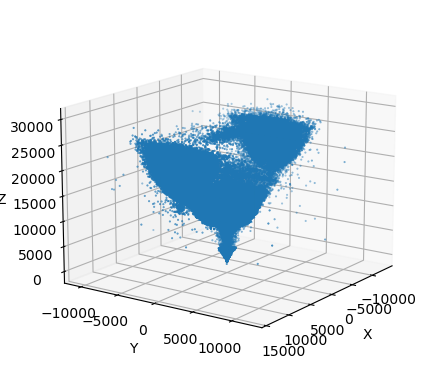

In [3]:
#vtx[particle][index of vertex]

vtx_x = ak.ravel(allcolumns.all_endvtx_x)
vtx_y = ak.ravel(allcolumns.all_endvtx_y)
vtx_z = ak.ravel(allcolumns.all_endvtx_z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(vtx_x, vtx_y, vtx_z, marker=".", s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 35)

plt.show()

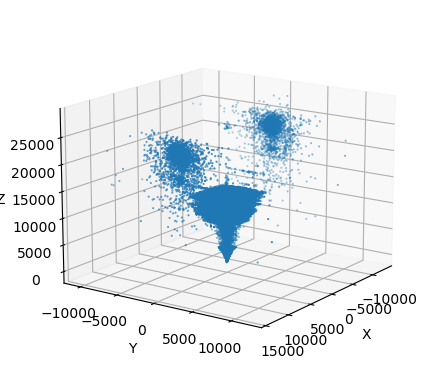

In [4]:
#create an array with all electron indices
electron = allcolumns[(allcolumns.isElectron)]
#electron.show()
#electron_ind = electron[electron.]
#electron_ind = electron_ind.to_numpy()
e_vtx_x = ak.ravel(electron.all_endvtx_x)
e_vtx_y = ak.ravel(electron.all_endvtx_y)
e_vtx_z = ak.ravel(electron.all_endvtx_z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(e_vtx_x, e_vtx_y, e_vtx_z, marker=".", s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 35)

plt.show()

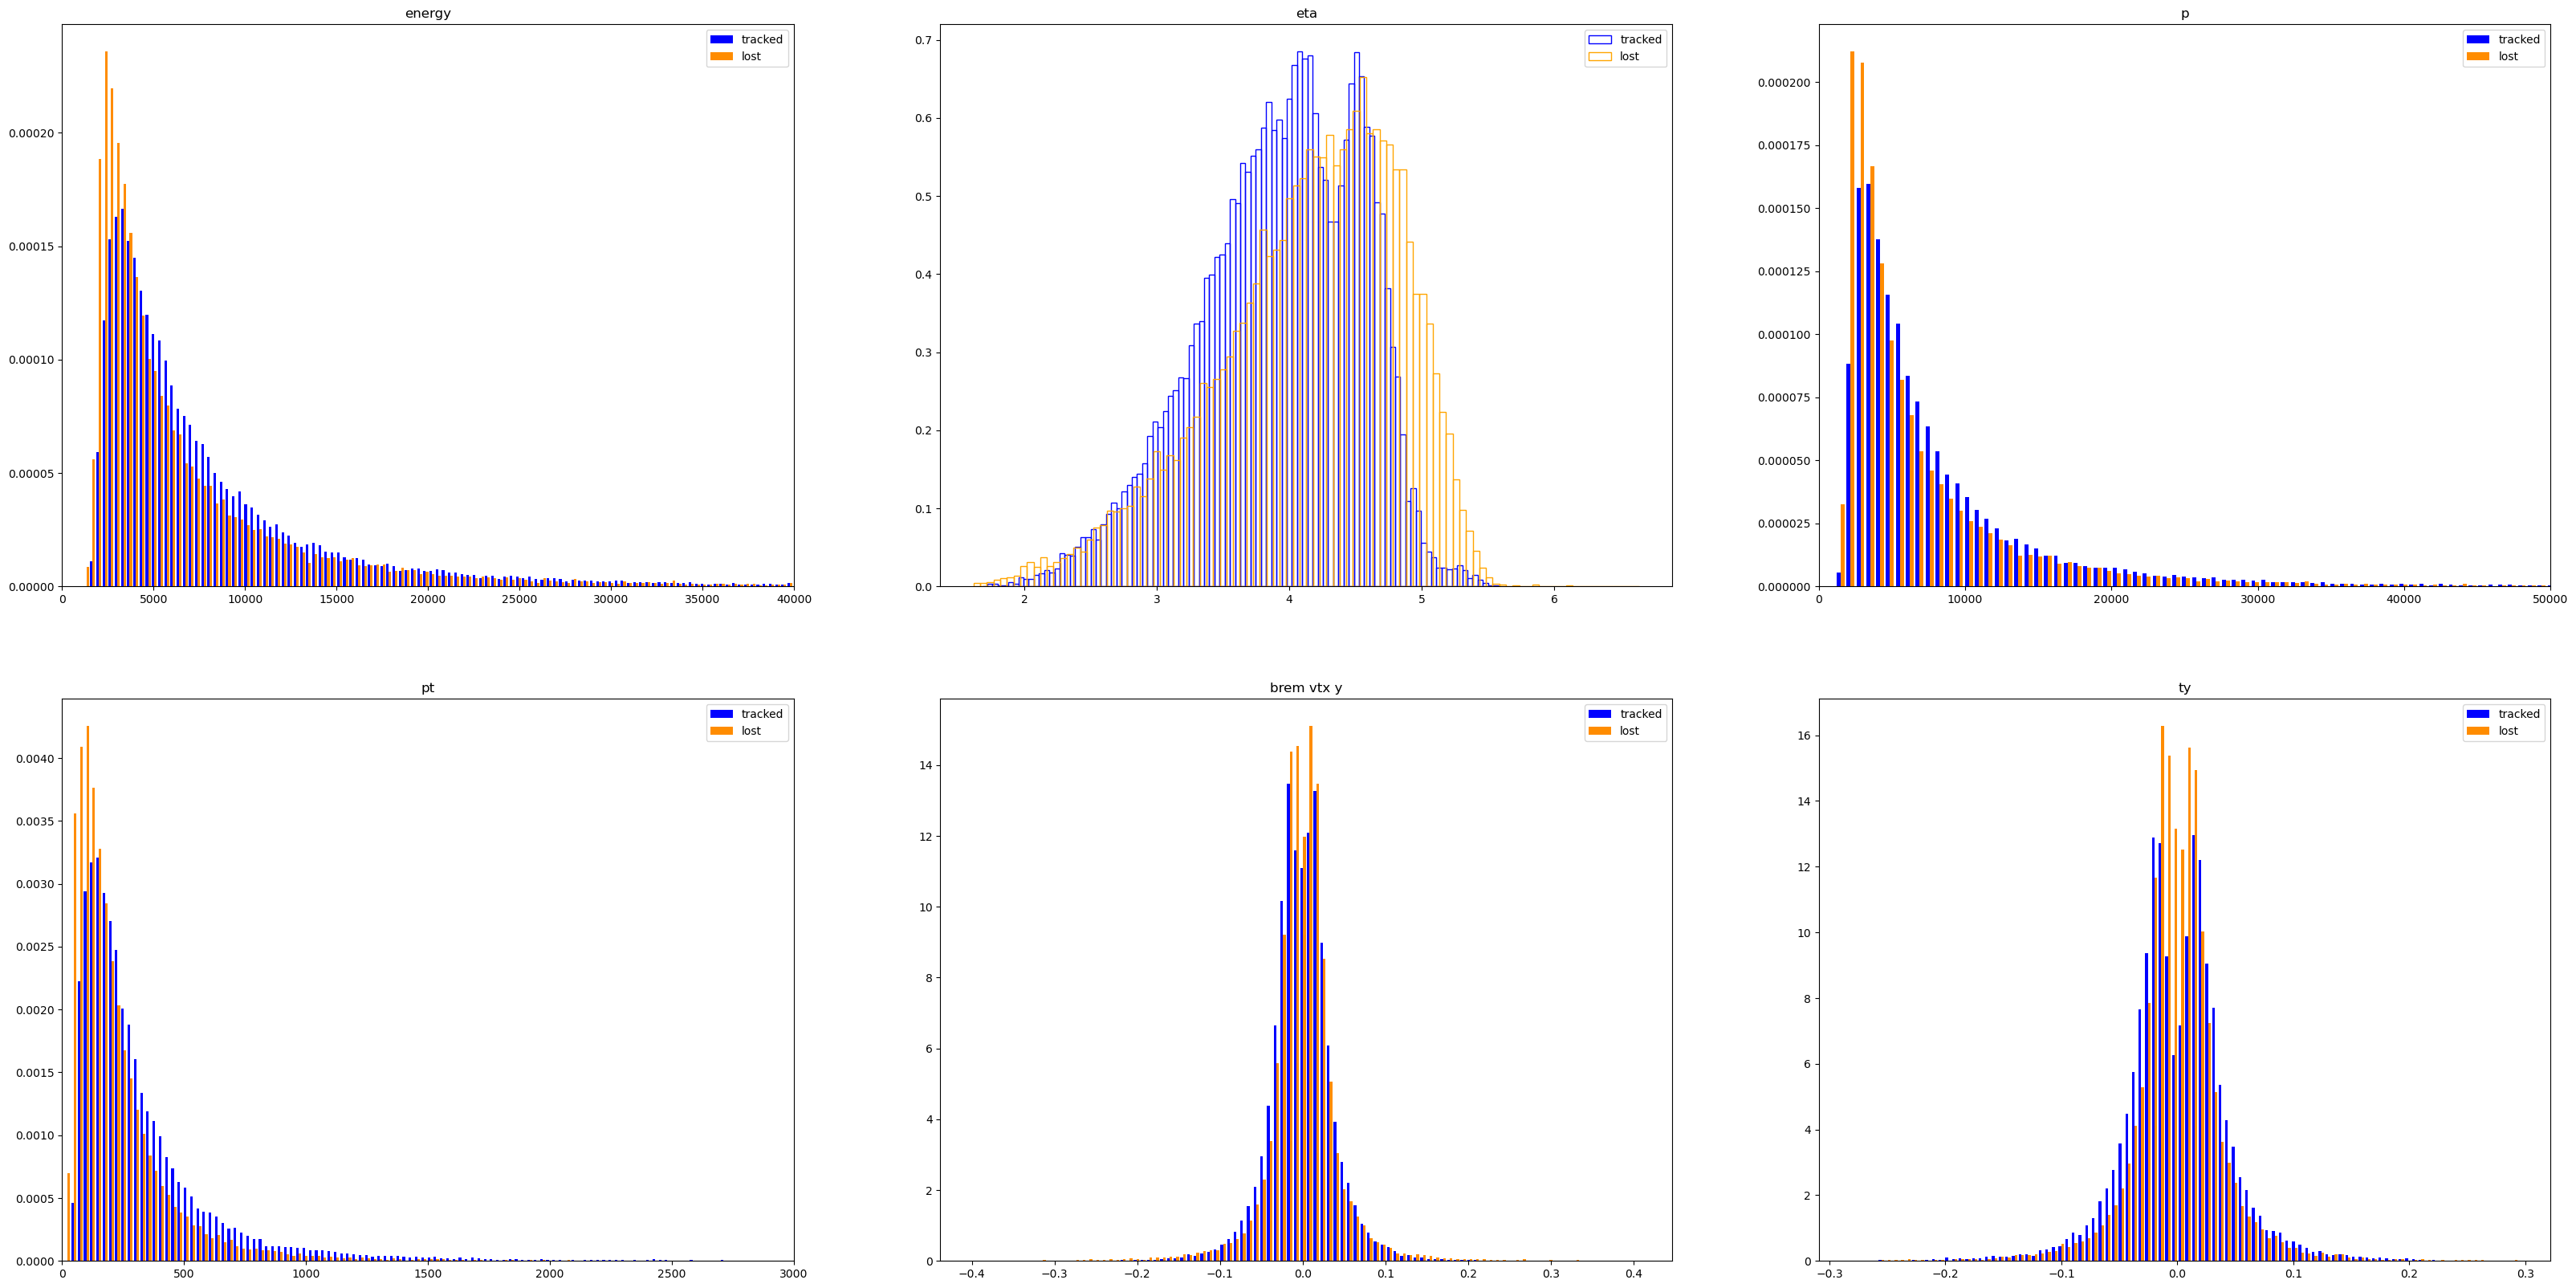

In [61]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(40,20))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]

ax0.hist([ak.ravel(tracked["energy"]),ak.ravel(lost["energy"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_xlim(0,40000)
ax0.set_title('energy')

ax1.hist(tracked["eta"], bins=100, label="tracked", edgecolor="blue", fill=False, density=True)
ax1.hist(lost["eta"], bins=100, label="lost", edgecolor="orange", fill=False, density=True)
ax1.legend()
ax1.set_title('eta')

ax2.hist([ak.ravel(tracked["p"]),ak.ravel(lost["p"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_xlim(0,50000)
ax2.set_title('p')

ax3.hist([ak.ravel(tracked["pt"]),ak.ravel(lost["pt"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_xlim(0,3000)
ax3.set_title('pt')

ax4.hist([ak.ravel(tracked["tx"]),ak.ravel(lost["tx"])], 100, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('brem vtx y')

ax5.hist([ak.ravel(tracked["ty"]),ak.ravel(lost["ty"])], 100, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('ty')

plt.show()


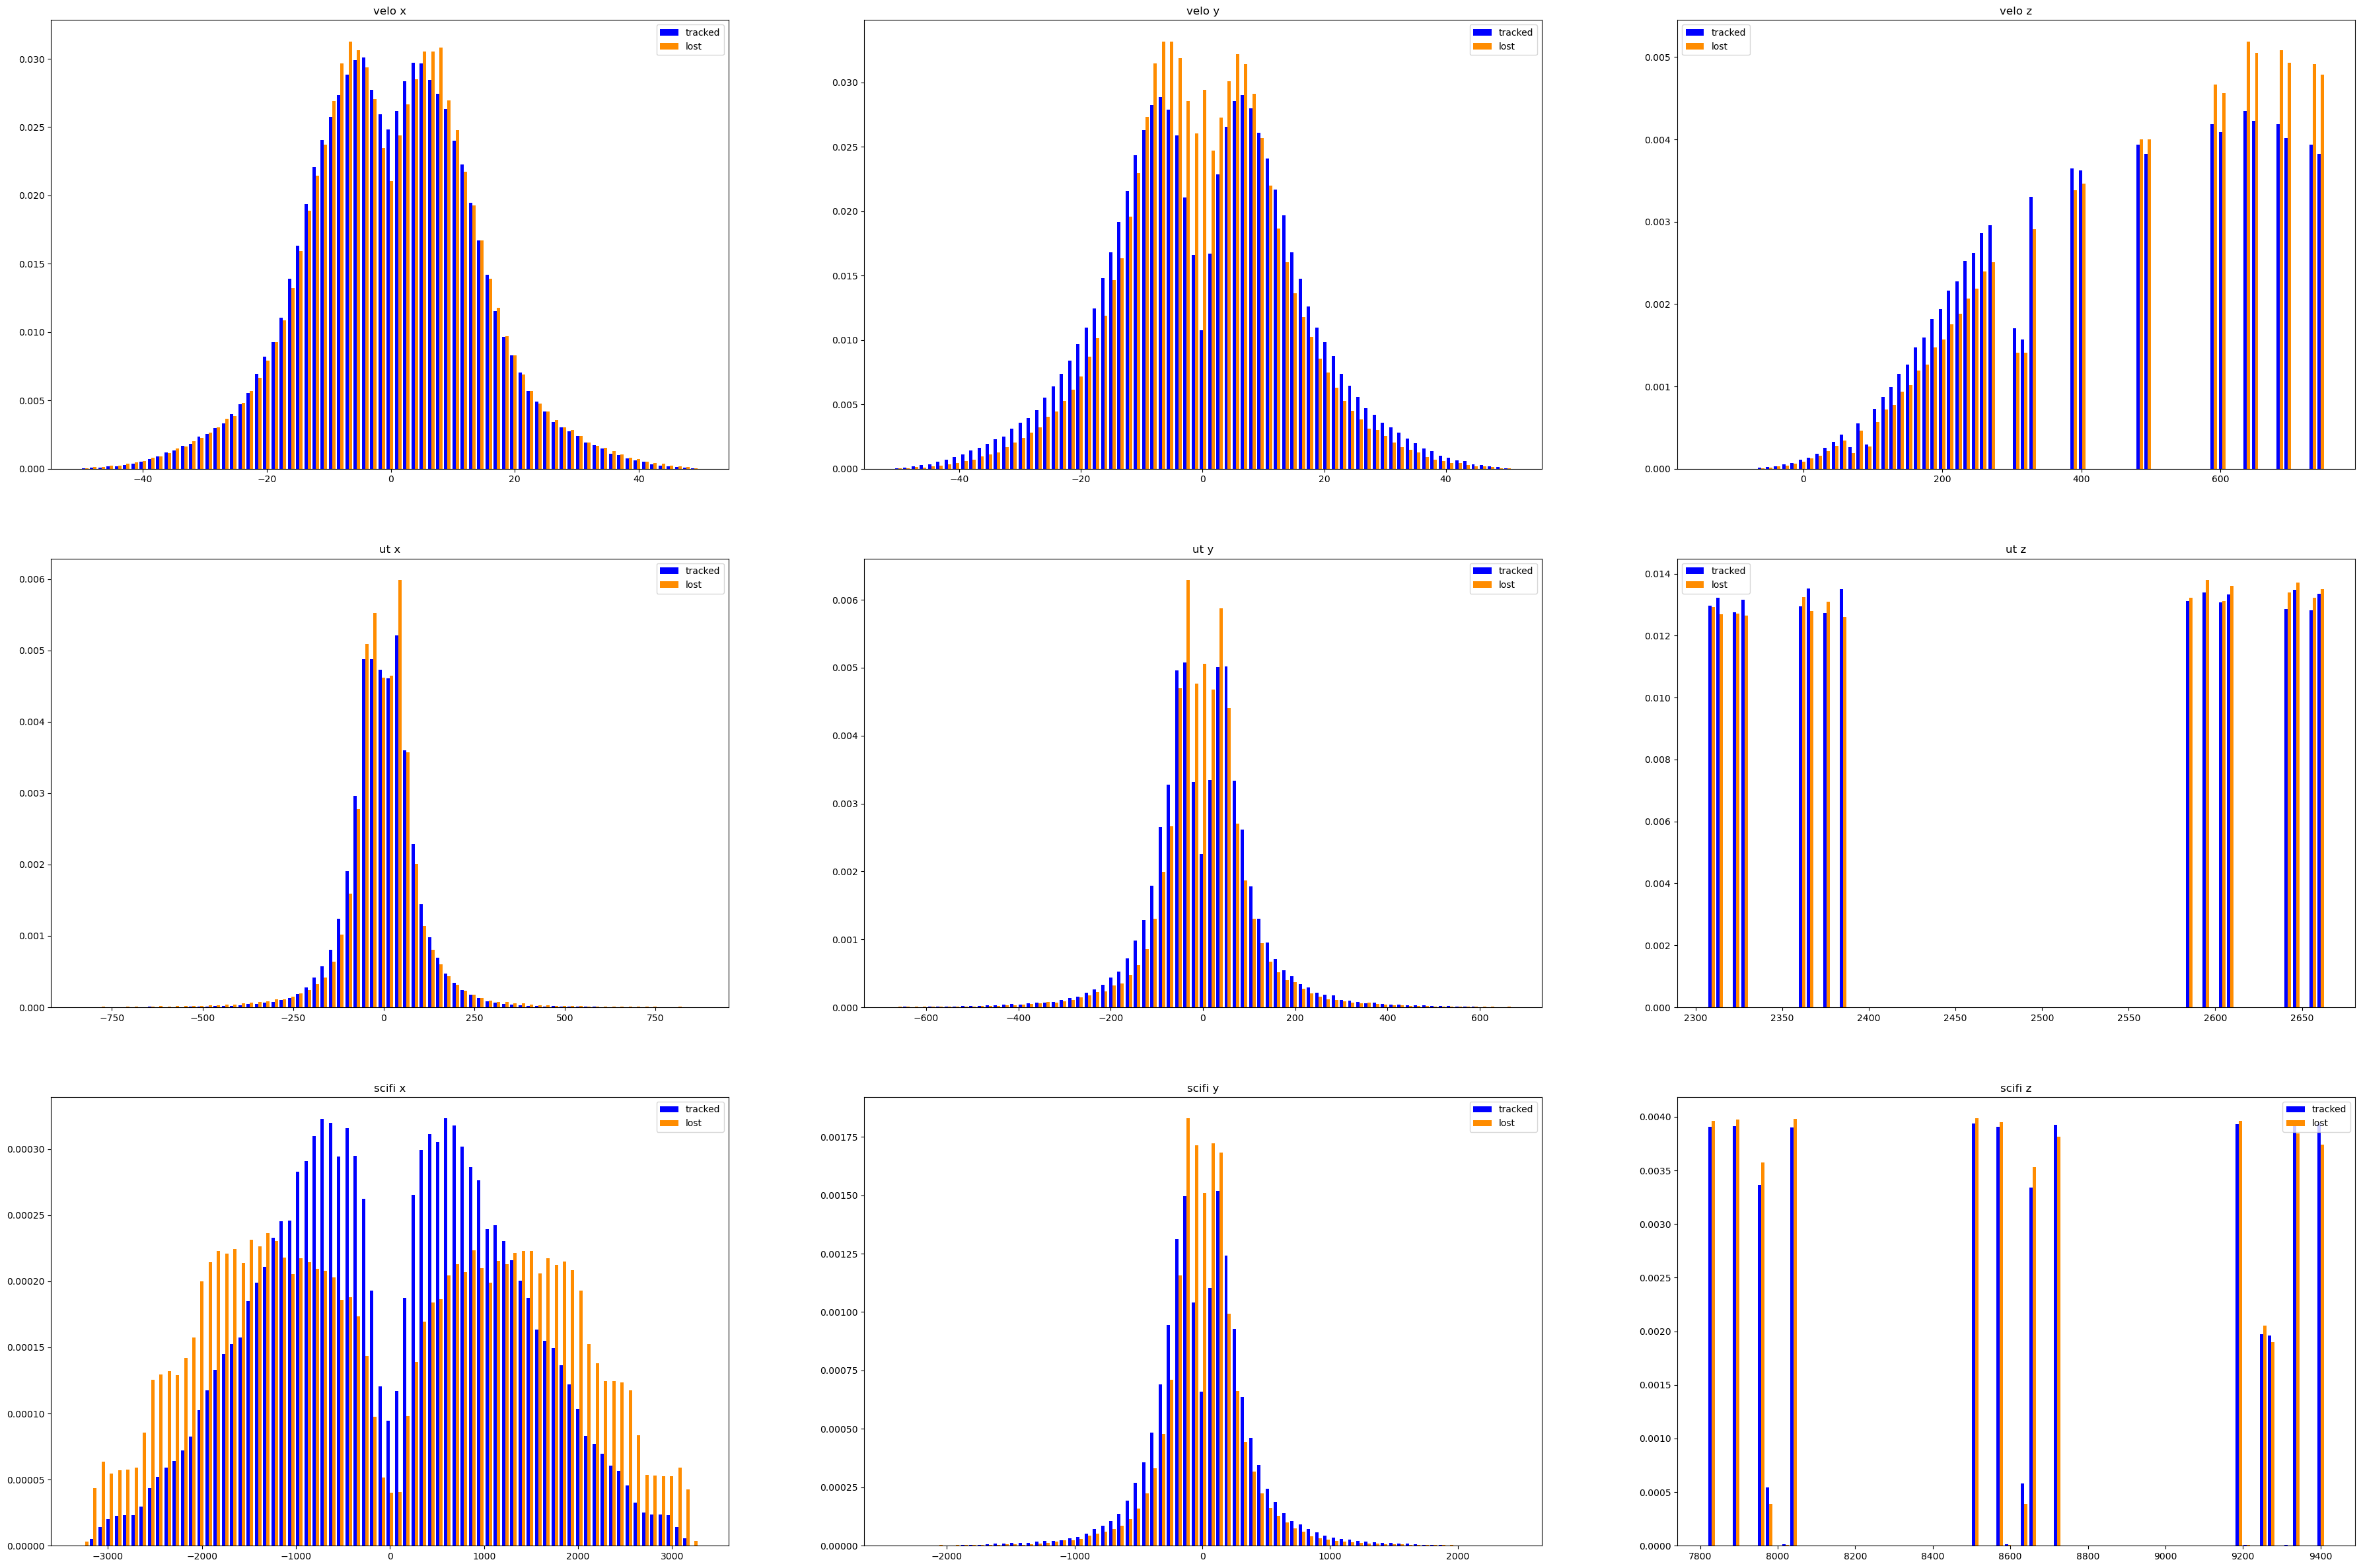

In [62]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3, figsize=(45,30))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=75

ax0.hist([ak.ravel(tracked["velo_hit_pos_x"]),ak.ravel(lost["velo_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_title('velo x')

ax1.hist([ak.ravel(tracked["velo_hit_pos_y"]),ak.ravel(lost["velo_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax1.legend()
ax1.set_title('velo y')

ax2.hist([ak.ravel(tracked["velo_hit_pos_z"]),ak.ravel(lost["velo_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_title('velo z')

ax3.hist([ak.ravel(tracked["ut_hit_pos_x"]),ak.ravel(lost["ut_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_title('ut x')

ax4.hist([ak.ravel(tracked["ut_hit_pos_y"]),ak.ravel(lost["ut_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('ut y')

ax5.hist([ak.ravel(tracked["ut_hit_pos_z"]),ak.ravel(lost["ut_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('ut z')

ax6.hist([ak.ravel(tracked["scifi_hit_pos_x"]),ak.ravel(lost["scifi_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax6.legend()
ax6.set_title('scifi x')

ax7.hist([ak.ravel(tracked["scifi_hit_pos_y"]),ak.ravel(lost["scifi_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax7.legend()
ax7.set_title('scifi y')

ax8.hist([ak.ravel(tracked["scifi_hit_pos_z"]),ak.ravel(lost["scifi_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax8.legend()
ax8.set_title('scifi z')


#fig.tight_layout()
plt.show()

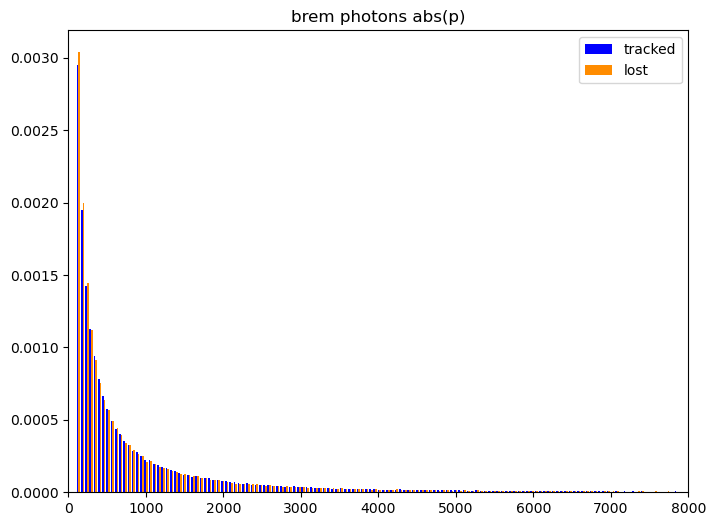

In [63]:
plt.figure(figsize=(8,6))
plt.hist([ak.ravel(tracked["brem_photons_pe"]), ak.ravel(lost["brem_photons_pe"])], 5000, density=True, histtype="bar", color=colors, label=labels)
plt.xlim(0,8000)
plt.title("brem photons abs(p)")
plt.legend()
plt.show()

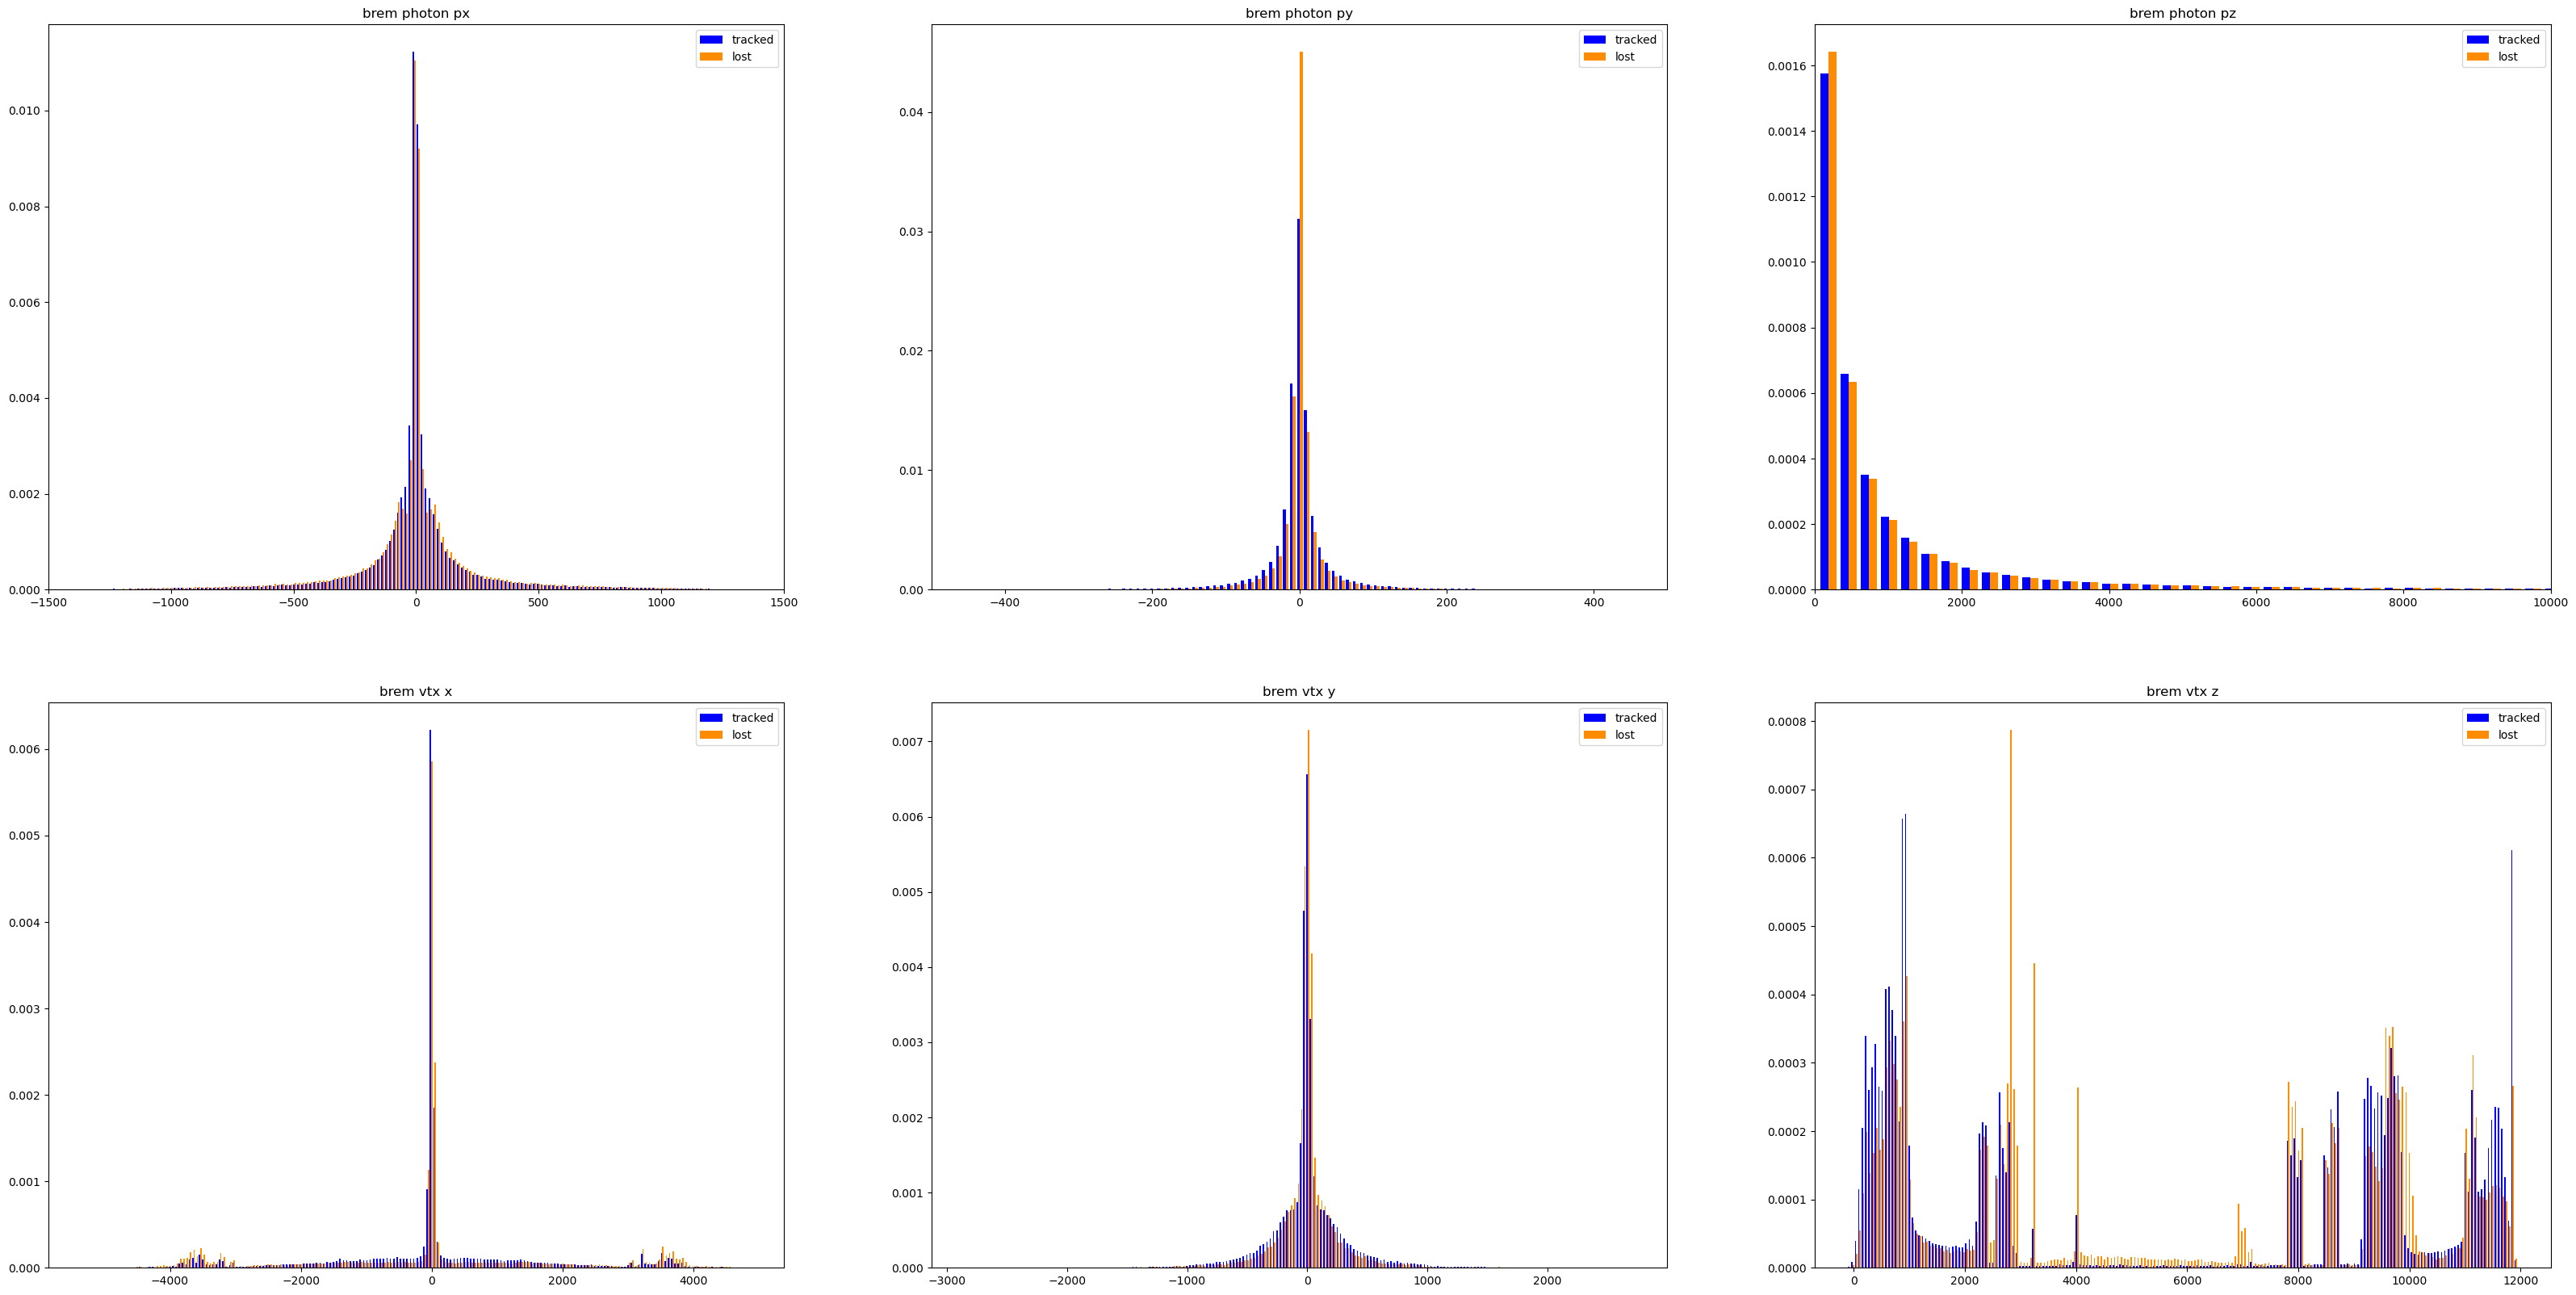

In [64]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(40,20))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=200

ax0.hist([ak.ravel(tracked["brem_photons_px"]),ak.ravel(lost["brem_photons_px"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_xlim(-1500,1500)
ax0.set_title('brem photon px')

ax1.hist([ak.ravel(tracked["brem_photons_py"]),ak.ravel(lost["brem_photons_py"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax1.legend()
ax1.set_xlim(-500,500)
ax1.set_title('brem photon py')

ax2.hist([ak.ravel(tracked["brem_photons_pz"]),ak.ravel(lost["brem_photons_pz"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_xlim(0,10000)
ax2.set_title('brem photon pz')

ax3.hist([ak.ravel(tracked["brem_vtx_x"]),ak.ravel(lost["brem_vtx_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_title('brem vtx x')

ax4.hist([ak.ravel(tracked["brem_vtx_y"]),ak.ravel(lost["brem_vtx_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('brem vtx y')

ax5.hist([ak.ravel(tracked["brem_vtx_z"]),ak.ravel(lost["brem_vtx_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('brem vtx z')

plt.show()

Text(0.5, 1.0, 'velo x')

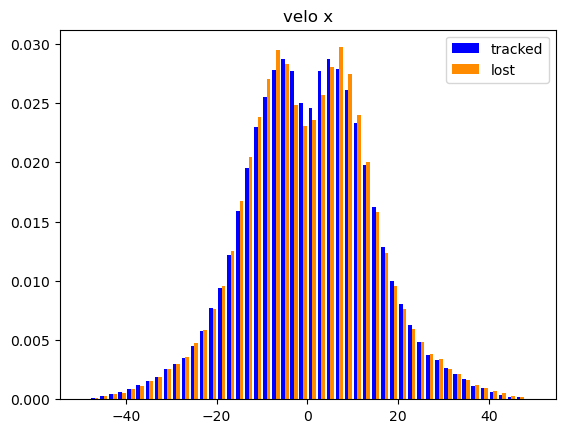

In [11]:
colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=50

plt.hist([ak.ravel(tracked["velo_hit_pos_x"]),ak.ravel(lost["velo_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
plt.legend()
plt.title('velo x')

In [16]:
tracked[1].tolist()

{'all_endvtx_types_length': 11,
 'all_endvtx_types': [101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  101.0,
  0.0],
 'all_endvtx_x_length': 11,
 'all_endvtx_x': [-5.370299816131592,
  -6.995699882507324,
  -20.013700485229492,
  -26.470500946044922,
  -82.10430145263672,
  -146.57949829101562,
  -894.7764282226562,
  -1237.57470703125,
  -1244.2630615234375,
  -1245.8055419921875,
  -1321.20361328125],
 'all_endvtx_y_length': 11,
 'all_endvtx_y': [-7.805699825286865,
  -10.154500007629395,
  -28.963199615478516,
  -38.28559875488281,
  -118.39790344238281,
  -210.52830505371094,
  -888.7171020507812,
  -1131.568359375,
  -1136.3031005859375,
  -1137.3917236328125,
  -1181.4761962890625],
 'all_endvtx_z_length': 11,
 'all_endvtx_z': [161.9427032470703,
  186.9705047607422,
  387.3406982421875,
  486.6791076660156,
  1340.39501953125,
  2322.552490234375,
  9494.216796875,
  12068.0263671875,
  12118.072265625,
  12129.564453125,
  12655.4697265625],
 'b

In [12]:
lost[0].tolist()

{'all_endvtx_types_length': 3,
 'all_endvtx_types': [101.0, 101.0, 0.0],
 'all_endvtx_x_length': 3,
 'all_endvtx_x': [1643.8668212890625, 2936.032470703125, 3191.061767578125],
 'all_endvtx_y_length': 3,
 'all_endvtx_y': [-922.9655151367188, -1172.96728515625, -1219.758056640625],
 'all_endvtx_z_length': 3,
 'all_endvtx_z': [9210.24609375, 12095.1630859375, 12668.1044921875],
 'brem_photons_pe_length': 2,
 'brem_photons_pe': [307.6462097167969, 144.2554931640625],
 'brem_photons_px_length': 2,
 'brem_photons_px': [123.86000061035156, 58.97999954223633],
 'brem_photons_py_length': 2,
 'brem_photons_py': [-24.309999465942383, -11.199999809265137],
 'brem_photons_pz_length': 2,
 'brem_photons_pz': [280.55999755859375, 131.1699981689453],
 'brem_vtx_x_length': 2,
 'brem_vtx_x': [1643.8668212890625, 2936.032470703125],
 'brem_vtx_y_length': 2,
 'brem_vtx_y': [-922.9655151367188, -1172.96728515625],
 'brem_vtx_z_length': 2,
 'brem_vtx_z': [9210.24609375, 12095.1630859375],
 'endvtx_type': 0,

In [14]:
file.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
all_endvtx_types_... | int32_t                  | AsDtype('>i4')
all_endvtx_types     | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_x_length  | int32_t                  | AsDtype('>i4')
all_endvtx_x         | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_y_length  | int32_t                  | AsDtype('>i4')
all_endvtx_y         | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_z_length  | int32_t                  | AsDtype('>i4')
all_endvtx_z         | float[]                  | AsJagged(AsDtype('>f4'))
brem_photons_pe_l... | int32_t                  | AsDtype('>i4')
brem_photons_pe      | float[]                  | AsJagged(AsDtype('>f4'))
brem_photons_px_l... | int32_t                  | AsDtype('>i4')
brem_photons_px      | float[]                  | AsJagged(AsDtype('>f4')

In [ ]:
"""
var="energy"
#plt.hist(tracked[var], bins=1000, label="tracked",edgecolor="blue", fill=False, density=True)
#plt.hist(lost[var], bins=1000, label="lost",edgecolor="darkorange", fill=False, density=True)
plt.hist([tracked[var], lost[var]],bins=1000,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlim([0,40000])
plt.xlabel(var+" [MeV]")
plt.ylabel("scaled")
plt.legend()
plt.show()

var="eta"
plt.hist(tracked[var], bins=100, label="tracked", edgecolor="blue", fill=False, density=True)
plt.hist(lost[var], bins=100, label="lost", edgecolor="orange", fill=False, density=True)
#plt.hist([tracked[var], lost[var]],bins=150,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(var)
plt.ylabel("scaled")
plt.legend()
plt.show()

var="p"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=200,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(var+f" [MeV/$c^2$]")
plt.ylabel("scaled")
plt.xlim([0,150000])
plt.legend()
plt.show()

var="pt"
#plt.hist(tracked[var], bins=200, label="tracked",density=True)
#plt.hist(lost[var], bins=200, label="lost", density=True)
plt.hist([tracked[var], lost[var]],bins=200,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"p transversal [MeV/$c^2$]")
plt.ylabel("counts")
plt.xlim([0,6000])
plt.legend()
plt.show()

var="tx"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=100,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"tx [MeV/$c^2$]")
plt.ylabel("counts")
#plt.xlim([0,6000])
plt.legend()
plt.show()

var="ty"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=100,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"ty [MeV/$c^2$]")
plt.ylabel("counts")
#plt.xlim([0,6000])
plt.legend()
plt.show()
"""